In [1]:
#dependencies 
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
#setting url to scrape and and passing in the url
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
#creating rows dictionary
rows = []

In [5]:
#using browser to look for a table rows
for row in browser.find_by_css('tr'):
    rows.append(row.text.split(' '))

In [6]:
#quitting the scrap
browser.quit()

In [7]:
#reading the scrap into a dataframe
mars_table_data = pd.DataFrame(rows)
mars_table_data.head()

,0,1,2,3,4,5,6
0,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


In [8]:
#setting the column names as the column names
mars_table_data.columns = mars_table_data[:1].values[0]
mars_table_data.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


In [9]:
#removing first row of data containing the column names
mars_table_data = mars_table_data.drop([0])
mars_table_data.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


In [10]:
#reset index
mars_table_data = mars_table_data.reset_index()
mars_table_data.head()

,index,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,1,2,2012-08-16,10,155,6,-75.0,739.0
1,2,13,2012-08-17,11,156,6,-76.0,740.0
2,3,24,2012-08-18,12,156,6,-76.0,741.0
3,4,35,2012-08-19,13,157,6,-74.0,732.0
4,5,46,2012-08-20,14,157,6,-74.0,740.0


In [11]:
#dropping the index column
mars_table_data = mars_table_data.drop(columns='index')
mars_table_data.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [12]:
#looking at datatypes
mars_table_data.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
#convert columns to the following: datetime, int, or float
mars_table_data['terrestrial_date'] = pd.to_datetime(mars_table_data['terrestrial_date'])

In [14]:
mars_table_data[['id', 'sol', 'ls', 'month']] = mars_table_data[['id', 'sol', 'ls', 'month']].astype(int)

In [15]:
mars_table_data[['min_temp', 'pressure']]= mars_table_data[['min_temp', 'pressure']].astype(float)

In [16]:
mars_table_data.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

How many months exist on Mars?

12 unique months exist on Mars. 

In [17]:
mars_table_data['month'].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

How many Martian (and not Earth) days worth of data exist in the scraped dataset?

1867 days

In [18]:
mars_table_data['sol'].count()

1867

What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

As the results show below, the coldest months are months 3 and 4. The warmest months are months 8 and 9.

In [19]:
#first groupby month
mars_bymonth = mars_table_data.groupby(['month'])

In [20]:
#find the average temp
avg_temp = mars_bymonth["min_temp"].mean()

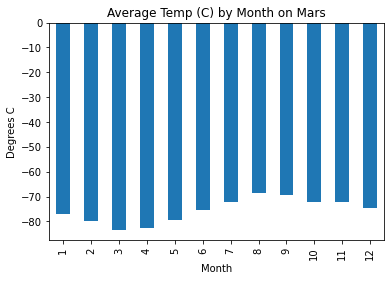

In [21]:
#plot the results
avg_temp.plot(kind="bar")
plt.ylabel("Degrees C")
plt.xlabel("Month")
plt.title("Average Temp (C) by Month on Mars")
plt.show()

Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

Months 5 and 6 have the lowest atmospheric pressure, months 9 and 10 have the highest atmospheric pressure. 

In [22]:
avg_press = mars_bymonth["pressure"].mean()

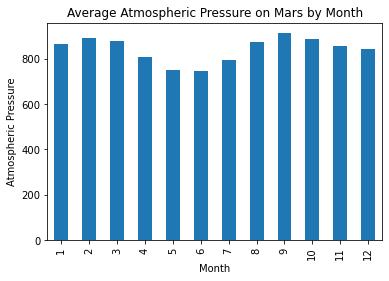

In [23]:
avg_press.plot(kind="bar")
plt.ylabel("Atmospheric Pressure")
plt.xlabel("Month")
plt.title("Average Atmospheric Pressure on Mars by Month")
plt.show()

Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

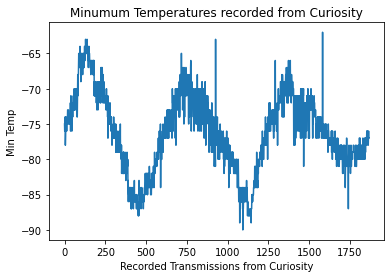

In [24]:
#To start I will plot the min_temp as a line graph
mars_table_data["min_temp"].plot()
plt.ylabel("Min Temp")
plt.xlabel("Recorded Transmissions from Curiosity")
plt.title("Minumum Temperatures recorded from Curiosity")
plt.show()

In [25]:
#To estimate the time it takes to circle the sun once or a year on Mars, you can look at trends in the weather pattern. The-
##highest recorded temperatures will occur when Curiosity is closest to the sun, or when Mars is closest to the sun. I will-
###then subtract these two recorded transmissions to estimate that length of time. 

# 750-175 = 575 days passed on Earth